# 1. Linear Regression(선형회귀)
### 공부시간에 따른 시험 점수

In [1]:
import sklearn
sklearn.__version__

'1.5.2'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset  = pd.read_csv('LinearRegressionData.csv')

In [4]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [5]:
# 처음부터 마지막 컬럼 직전까지의 테이터 [독립 변수]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [7]:
from sklearn.linear_model import LinearRegression
# 객체 생성
reg = LinearRegression()
# 학습 [모델 생성]
reg.fit(X,y)

LinearRegression()

In [8]:
# X에 대한 예측값
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

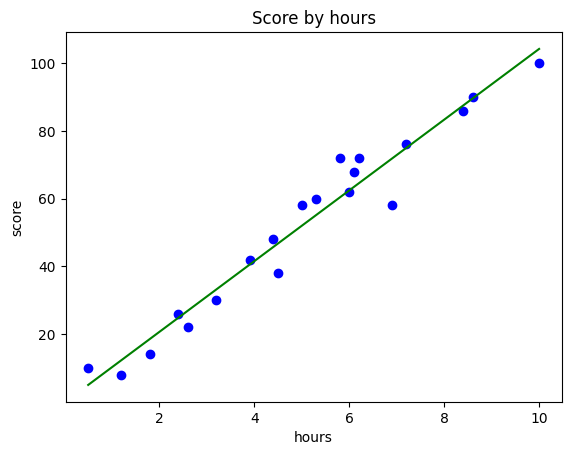

In [9]:
# 산점도
plt.scatter(X, y, color='blue')
# 선 그래프
plt.plot(X, y_pred, color='green')
# 제목
plt.title('Score by hours')
# X축 이름
plt.xlabel('hours')
# y축 이름
plt.ylabel('score')
plt.show()

In [10]:
print('9시간 공부했을 때 예상되는 점수 :', reg.predict([[9], [8], [7]]))

9시간 공부했을 때 예상되는 점수 : [93.77478776 83.33109082 72.88739388]


In [11]:
# 기울기 [m]
reg.coef_

array([10.44369694])

In [12]:
# y 절편 [b]
reg.intercept_

-0.218484702867201

y = mx + b -> y = 10.4436x - 0.2184

### 데이터셋트 분리

In [13]:
from sklearn.model_selection import train_test_split
# 훈련 80 : 테스트 20 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [15]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [16]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [17]:
# 전체 데이터 y
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [18]:
# 훈련 세트 y
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [19]:
# 테스트 세트 y
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [20]:
reg.fit(X_train, y_train)

LinearRegression()

### 데이터 시각화 (훈련세트)

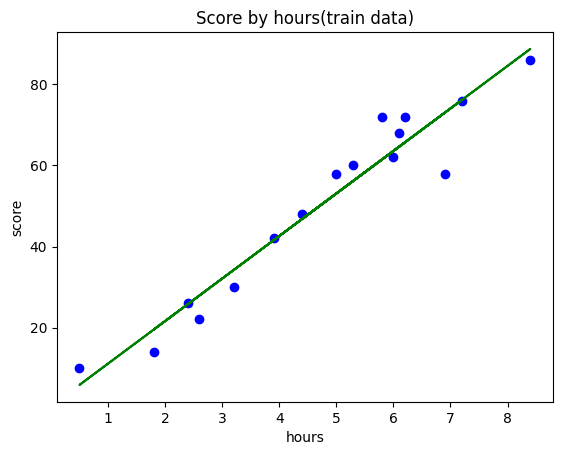

In [24]:
plt.scatter(X_train, y_train, color='blue')
# 선 그래프
plt.plot(X_train, reg.predict(X_train), color='green')
# 제목
plt.title('Score by hours(train data)')
# X축 이름
plt.xlabel('hours')
# y축 이름
plt.ylabel('score')
plt.show()

### 데이터시각화 (테스트 세트)

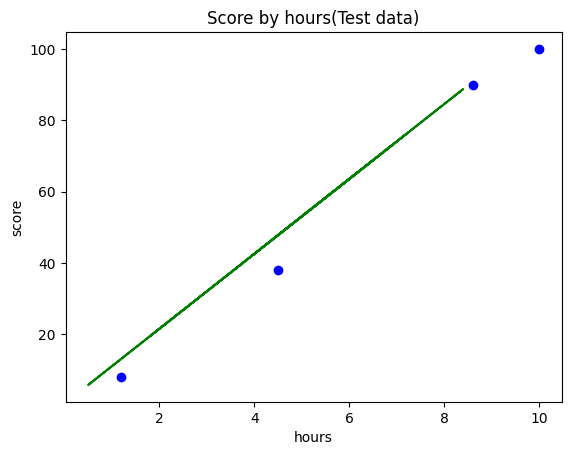

In [26]:
plt.scatter(X_test, y_test, color='blue')
# 선 그래프
plt.plot(X_train, reg.predict(X_train), color='green')
# 제목
plt.title('Score by hours(Test data)')
# X축 이름
plt.xlabel('hours')
# y축 이름
plt.ylabel('score')
plt.show()

In [27]:
reg.coef_

array([10.49161294])

In [28]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [29]:
# 테스트 세트를 통한 모델 평가
reg.score(X_test, y_test)

0.9727616474310156

In [30]:
# 훈련 세트를 통한 모델 평가
reg.score(X_train, y_train)

0.9356663661221668

## 경사 하강법(Gradient Descent)

In [60]:
# SDG : Stochastic Gradient Descent 확률적 경사 하강법
from sklearn.linear_model import SGDRegressor


# max_iter: 훈련세트 반복 횟수(Epoch(에포크) 횟수)
# eta0 : 학습률(learning rate(러닝레이트))
# 지수표기법
# 1e-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4 : 10000 (10^4)
# sr = SGDRegressor(max_iter=500, eta0=1e-3, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

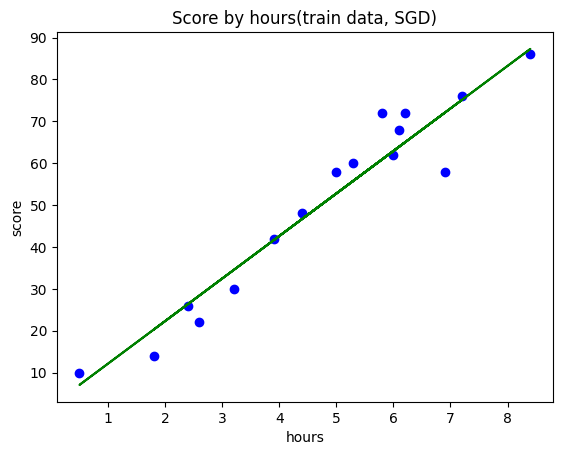

In [61]:
plt.scatter(X_train, y_train, color='blue')
# 선 그래프
plt.plot(X_train, sr.predict(X_train), color='green')
# 제목
plt.title('Score by hours(train data, SGD)')
# X축 이름
plt.xlabel('hours')
# y축 이름
plt.ylabel('score')
plt.show()

In [33]:
reg.coef_, sr.intercept_

(array([10.49161294]), array([1.33496428]))

In [35]:
# 테스트 세트를 통한 모델 평가
sr.score(X_test, y_test)

0.9721063388747896

In [36]:
# 훈련 세트를 통한 모델 평가
sr.score(X_train,y_train)

0.9354998037937884